In [57]:
import datetime as dt
import pandas as pd

df = pd.read_csv('cleaned_data/cycling.csv', parse_dates=['creationDate', 'startDate', 'endDate'])
df.head()

,sourceVersion,creationDate,startDate,endDate,miles
0,NaN,2015-05-24 07:52:21-07:00,2015-05-24 07:52:09-07:00,2015-05-24 07:52:21-07:00,0.000446
1,NaN,2015-05-24 07:52:27-07:00,2015-05-24 07:52:21-07:00,2015-05-24 07:52:27-07:00,0.000634
2,NaN,2015-05-24 07:52:33-07:00,2015-05-24 07:52:27-07:00,2015-05-24 07:52:33-07:00,0.000631
3,NaN,2015-05-24 07:52:38-07:00,2015-05-24 07:52:33-07:00,2015-05-24 07:52:38-07:00,0.000784
4,NaN,2015-05-24 07:52:44-07:00,2015-05-24 07:52:38-07:00,2015-05-24 07:52:44-07:00,0.001128


# Initial Cycling Analysis

## Daily totals

- Sum up miles by `startDate` day
- Calculate differences in time between startDate/endDate, place in new column as seconds
- Calculate daily total seconds

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166961 entries, 0 to 166960
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype                    
---  ------         --------------   -----                    
 0   sourceVersion  149705 non-null  object                   
 1   creationDate   166961 non-null  datetime64[ns, UTC-07:00]
 2   startDate      166961 non-null  datetime64[ns, UTC-07:00]
 3   endDate        166961 non-null  datetime64[ns, UTC-07:00]
 4   miles          166961 non-null  float64                  
dtypes: datetime64[ns, UTC-07:00](3), float64(1), object(1)
memory usage: 6.4+ MB


In [35]:
df['seconds'] = (df['endDate'] - df['startDate']).dt.total_seconds()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166961 entries, 0 to 166960
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype                    
---  ------         --------------   -----                    
 0   sourceVersion  149705 non-null  object                   
 1   creationDate   166961 non-null  datetime64[ns, UTC-07:00]
 2   startDate      166961 non-null  datetime64[ns, UTC-07:00]
 3   endDate        166961 non-null  datetime64[ns, UTC-07:00]
 4   miles          166961 non-null  float64                  
 5   seconds        166961 non-null  float64                  
dtypes: datetime64[ns, UTC-07:00](3), float64(2), object(1)
memory usage: 7.6+ MB


In [36]:
df.seconds.describe()

count    166961.000000
mean          3.704152
std          28.570681
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        4647.000000
Name: seconds, dtype: float64

In [37]:
df.head()

,sourceVersion,creationDate,startDate,endDate,miles,seconds
0,NaN,2015-05-24 07:52:21-07:00,2015-05-24 07:52:09-07:00,2015-05-24 07:52:21-07:00,0.000446,12.0
1,NaN,2015-05-24 07:52:27-07:00,2015-05-24 07:52:21-07:00,2015-05-24 07:52:27-07:00,0.000634,6.0
2,NaN,2015-05-24 07:52:33-07:00,2015-05-24 07:52:27-07:00,2015-05-24 07:52:33-07:00,0.000631,6.0
3,NaN,2015-05-24 07:52:38-07:00,2015-05-24 07:52:33-07:00,2015-05-24 07:52:38-07:00,0.000784,5.0
4,NaN,2015-05-24 07:52:44-07:00,2015-05-24 07:52:38-07:00,2015-05-24 07:52:44-07:00,0.001128,6.0


In [47]:
df_date = df.groupby(df['startDate'].dt.date)[['miles', 'seconds']].sum().reset_index()
df_date.head()

,startDate,miles,seconds
0,2015-05-23,3.613076,1573.0
1,2015-05-24,7.174355,10320.0
2,2015-05-25,7.371056,3434.0
3,2015-05-26,6.341940,2321.0
4,2015-05-27,5.161332,1956.0


<Axes: title={'center': 'Daily miles cycled'}, xlabel='startDate'>

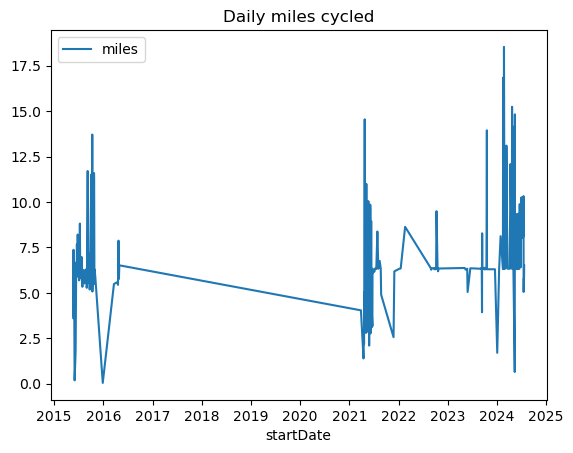

In [49]:
df_date.plot(x='startDate', y='miles', title='Daily miles cycled')

In [50]:
df_date['avg_mph'] = df_date['miles'] / (df_date['seconds'] / 3600)

In [51]:
df_date.tail()

,startDate,miles,seconds,avg_mph
285,2024-07-17,10.325663,3137.0,11.849661
286,2024-07-18,5.051039,1677.0,10.843017
287,2024-07-19,5.795308,2369.0,8.806715
288,2024-07-21,5.849699,6583.0,3.198985
289,2024-07-22,6.501104,2140.0,10.936437


<Axes: title={'center': '2024 Cycling Miles by Day'}, xlabel='startDate'>

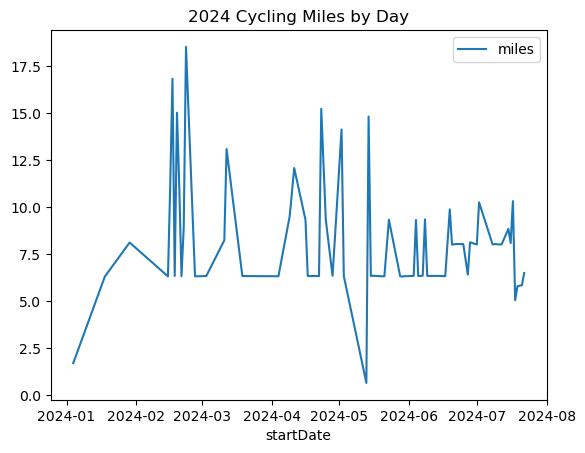

In [62]:
df_date_2024 = df_date[df_date['startDate'] >= dt.date(2024, 1, 1)]
df_date_2024.plot(x='startDate', y='miles', 
                  title='2024 Cycling Miles by Day')